## Propedéuticos CIMAT 2021 
#### Descenso del Gradiente
##### Giovanni Gamaliel López Padilla


La función Rosenbrock es una función no convexa, es también conocida como Rosenbrock's valley o Rosenbrock's banana function.

La función esta definida como:
$$
f(x,y) = (1-x)^2+100(y-x^2)^2
$$

<img src="Rosenbrock.png" width="400">

Calculando el gradiente de f(x,y) se obtiene que es igual a:
$$
\nabla f(x,y) = \begin{pmatrix} 
-2(1-x)-400x(y-x^2) \\
200(y-x^2)
\end{pmatrix}
$$

In [1]:
import moviepy.video.io.ImageSequenceClip as Movie_maker
from sklearn import linear_model, datasets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os

In [2]:
class optimization_algorithm:
    def __init__(self, theta=[], gd_params={}):
        self.theta = theta
        self.gd_params = gd_params

    def create_values(self):
        n_samples = 500
        x, y = datasets.make_regression(n_samples=n_samples,
                                        n_features=1,
                                        n_informative=2,
                                        noise=5,
                                        random_state=0)
        n_outliers = 100
        x[:n_outliers], y[:n_outliers] = datasets.make_regression(n_samples=n_outliers,
                                                                  n_features=1,
                                                                  n_informative=2,
                                                                  noise=2,
                                                                  random_state=61)
        y = np.expand_dims(y, axis=1)
        return x, y

    def grad_rosenbrock(self, theta):
        partial1 = theta[1]-theta[0]**2
        partial0 = -2*(1-theta[0])-2*theta[0]*partial1
        gradient = np.array([partial0, partial1])
        return gradient

    def apply_GD(self, theta=[], gd_params={}, grad=None):
        '''
        Descenso de gradiente

        Parámetros
        -----------
        theta     :   condicion inicial
        grad      :   función que calcula el gradiente
        gd_params :   lista de parametros para el algoritmo de descenso, 
                        nIter = gd_params[0] número de iteraciones
                        alpha = gd_params[1] tamaño de paso alpha   
        Regresa
        -----------
        Theta     :   trayectoria de los parametros
                        Theta[-1] es el valor alcanzado en la ultima iteracion
        '''
        grad = self.grad_rosenbrock
        nIter = gd_params['nIter']
        alpha = gd_params['alpha']
        Theta = []
        for t in range(nIter):
            p = grad(theta)
            theta = theta - alpha*p
            Theta.append(theta)
        return np.array(Theta)

    def apply_NAG(self, theta=[], gd_params={}, grad=None):
        '''
        Descenso acelerado de Nesterov

        Parámetros
        -----------
        theta     :   condicion inicial
        grad      :   funcion que calcula el gradiente
        gd_params :   lista de parametros para el algoritmo de descenso, 
                        nIter = gd_params['nIter'] número de iteraciones
                        alpha = gd_params['alpha'] tamaño de paso alpha
                        eta   = gd_params['eta']  parametro de inercia (0,1]              

        Regresa
        -----------
        Theta     :   trayectoria de los parametros
                        Theta[-1] es el valor alcanzado en la ultima iteracion
        '''
        grad = self.grad_rosenbrock
        nIter = gd_params['nIter']
        alpha = gd_params['alpha']
        eta = gd_params['eta']
        p = np.zeros(theta.shape)
        Theta = []

        for t in range(nIter):
            pre_theta = theta - 2.0*alpha*p
            g = grad(pre_theta)
            p = g + eta*p
            theta = theta - alpha*p
            Theta.append(theta)
        return np.array(Theta)

    def apply_ADAM(self, theta=[], gd_params={}, grad=None):
        '''
        Descenso de Gradiente Adaptable con Momentum(A DAM) 

        Parámetros
        -----------
        theta     :   condicion inicial
        grad      :   funcion que calcula el gradiente
        gd_params :   lista de parametros para el algoritmo de descenso, 
                        nIter    = gd_params['nIter'] número de iteraciones
                        alphaADA = gd_params['alphaADAM'] tamaño de paso alpha
                        eta1     = gd_params['eta1'] factor de momentum para la direccion 
                                    de descenso (0,1)
                        eta2     = gd_params['eta2'] factor de momentum para la el 
                                    tamaño de paso (0,1)
        Regresa
        -----------
        Theta     :   trayectoria de los parametros
                        Theta[-1] es el valor alcanzado en la ultima iteracion
        '''
        grad = self.grad_rosenbrock
        epsilon = 1e-8
        nIter = gd_params['nIter']
        alpha = gd_params['alphaADAM']
        eta1 = gd_params['eta1']
        eta2 = gd_params['eta2']
        p = np.zeros(theta.shape)
        v = 0.0
        Theta = []
        eta1_t = eta1
        eta2_t = eta2
        for t in range(nIter):
            g = grad(theta)
            p = eta1*p + (1.0-eta1)*g
            v = eta2*v + (1.0-eta2)*(g**2)
            #p = p/(1.-eta1_t)
            #v = v/(1.-eta2_t)
            theta = theta - alpha * p / (np.sqrt(v)+epsilon)
            eta1_t *= eta1
            eta2_t *= eta2
            Theta.append(theta)
        return np.array(Theta)

    def apply_NADAM(self, theta=[], gd_params={}, grad=None):
        '''
        Descenso de Gradiente Adaptable con Momentum(A DAM) 

        Parámetros
        -----------
        theta     :   condicion inicial
        grad      :   funcion que calcula el gradiente
        gd_params :   lista de parametros para el algoritmo de descenso, 
                        nIter    = gd_params['nIter'] número de iteraciones
                        alphaADA = gd_params['alphaADAM'] tamaño de paso alpha
                        eta1     = gd_params['eta1'] factor de momentum para la direccion 
                                    de descenso (0,1)
                        eta2     = gd_params['eta2'] factor de momentum para la el 
                                    tamaño de paso (0,1)
        Regresa
        -----------
        Theta     :   trayectoria de los parametros
                        Theta[-1] es el valor alcanzado en la ultima iteracion
        '''
        grad = self.grad_rosenbrock
        epsilon = 1e-8
        nIter = gd_params['nIter']
        alpha = gd_params['alphaNADAM']
        eta1 = gd_params['eta1NADAM']
        eta2 = gd_params['eta2NADAM']
        p = np.zeros(theta.shape)
        v = 0.0
        Theta = []
        eta1_t = eta1
        eta2_t = eta2
        for t in range(nIter):
            g = grad(theta)
            p = eta1*p + (1.0-eta1)*g
            v = eta2*v + (1.0-eta2)*(g**2)
            pretheta = eta1*p+(1-eta1)*g/(1-eta1**(t+3))
            theta = theta - alpha * pretheta / (np.sqrt(v)+epsilon)
            eta1_t *= eta1
            eta2_t *= eta2
            Theta.append(theta)
        return np.array(Theta)

    def run(self):
        self.ThetaGD = self.apply_GD(theta=theta,
                                     gd_params=gd_params)
        self.ThetaNAG = self.apply_NAG(theta=theta,
                                       gd_params=gd_params)
        self.ThetaADAM = self.apply_ADAM(theta=theta,
                                         gd_params=gd_params)
        self.ThetaNADAM = self.apply_NADAM(theta=theta,
                                           gd_params=gd_params)
        self.print_results()

    def print_results(self):
        self.print_each_results("GD",
                                self.theta,
                                self.ThetaGD[-1, :])
        self.print_each_results("NAG",
                                self.theta,
                                self.ThetaNAG[-1, :])
        self.print_each_results("ADAM",
                                self.theta,
                                self.ThetaADAM[-1, :])
        self.print_each_results("NADAM",
                                self.theta,
                                self.ThetaNADAM[-1, :])

    def print_each_results(self, algorith="", initial=[], final=[]):
        print('{}\tInicio: {} --> Fin: {}'.format(algorith,
                                                  initial,
                                                  final))

    def plot(self):
        mpl.rcParams['legend.fontsize'] = 14
        fig = plt.figure()
        ax = plt.subplot(projection='3d')
        nIter = np.expand_dims(np.arange(self.ThetaGD.shape[0]), 1)
        Tmax = 200
        self.plot_each_frame(ax,
                             Tmax,
                             nIter)
        ax.set_title(
            'Trayectorias los parámetros calculados con distintos algoritmos')
        plt.show()

    def plot_each_frame(self, ax=None, limit=200, nIter=[]):
        ax.plot(self.ThetaGD[:limit, 0],
                self.ThetaGD[:limit, 1],
                nIter[:limit, 0],
                label='GD',
                color="#4895ef",
                lw=1.5)
        ax.plot(self.ThetaNAG[:limit, 0],
                self.ThetaNAG[:limit, 1],
                nIter[:limit, 0],
                label='NAG',
                color="#3a0ca3",
                lw=1.5)
        ax.plot(self.ThetaADAM[:limit, 0],
                self.ThetaADAM[:limit, 1],
                nIter[:limit, 0],
                label='ADAM',
                color="#f72585",
                lw=1.5)
        ax.plot(self.ThetaNADAM[:limit, 0],
                self.ThetaNADAM[:limit, 1],
                nIter[:limit, 0],
                label='NADAM',
                color="#d00000",
                lw=1.5)
        ax.legend(frameon=False,
                  ncol=2)
        ax.view_init(23, -20)
        ax.set_xlabel('$\\theta_1$')
        ax.set_ylabel('$\\theta_0$')
        ax.set_zlabel('Iteración', rotation=45)
        plt.subplots_adjust(left=0,
                            bottom=0,
                            right=1,
                            top=0.898)

    def create_animation(self):
        self.create_graphics()
        self.create_movie()

    def create_graphics(self):
        fig = plt.figure()
        nIter = np.expand_dims(np.arange(self.ThetaGD.shape[0]), 1)
        Tmax = 200
        for iteration in range(2, Tmax+1):
            ax = plt.subplot(projection='3d')
            self.plot_each_frame(ax,
                                 iteration,
                                 nIter)
            ax.set_title(
                'Trayectorias los parámetros calculados con distintos algoritmos\niteracion número {}'.format(iteration))
            iteration = str(iteration).zfill(3)
            plt.savefig("{}.png".format(iteration))
            plt.clf()

    def create_movie(self):
        """
        Funcion que crea el gif a partir de las graficas diarias
        """
        filenames = sorted(os.listdir())
        filenames = [file for file in filenames if file.endswith(".png")]

        output_file = "animation.mp4"
        movie = Movie_maker.ImageSequenceClip(filenames,
                                              fps=20)
        movie.write_videofile(output_file)
        os.system("rm *.png")

In [3]:
# condición inicial
theta = np.random.normal(size=2)
# parámetros del algoritmo
gd_params = {'alpha': 0.05,
             'alphaADADELTA': 0.7,
             'alphaADAM': 0.95,
             'alphaNADAM': 0.95,
             'nIter': 300,
             'batch_size': 100,
             'eta': 0.9,
             'eta1': 0.9,
             'eta2': 0.999,
             'eta1NADAM': 0.99,
             'eta2NADAM': 0.899}

GD	Inicio: [-0.78503111 -0.9380644 ] --> Fin: [0.99569207 0.9877246 ]
NAG	Inicio: [-0.78503111 -0.9380644 ] --> Fin: [1. 1.]
ADAM	Inicio: [-0.78503111 -0.9380644 ] --> Fin: [1.00000029 0.99999975]
NADAM	Inicio: [-0.78503111 -0.9380644 ] --> Fin: [1.00769845 0.99192486]


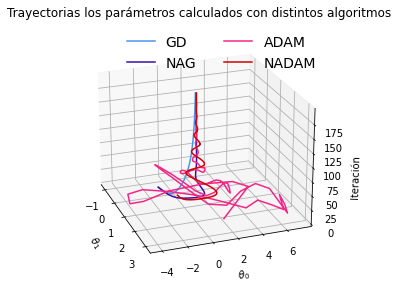

In [4]:
optimization = optimization_algorithm(theta,
                                      gd_params)
optimization.run()
optimization.plot()
# Descomentar para crear la animacion
# El proceso para crear la animación no funciona en notebooks
# optimization.create_animation()

El notebook en version .py y la animación realizada se encuentra en los siguientes enlaces 
+ [Algoritmos de Descenso del Gradiente](https://raw.githubusercontent.com/giovannilopez9808/Propedeuticos_CIMAT/main/Sesion_2/scripts/optimization.py)
+ [Animación](https://github.com/giovannilopez9808/Propedeuticos_CIMAT/raw/main/Sesion_2/scripts/animation.mp4)